In [1]:
# Class IT-533 Week #7  - Tree Algorithms and Random Forest
# Summer 2020
# Week #7  Practice Code
# By Wei Geng(David)
# Created on: 06/28/2020

In [2]:
# Convert to pandas DataFrame
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install graphviz
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/intelspeedstep/AMOD533/master/UCI_Credit_Card.csv')
print(df.info(verbose=True))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### -------------------------------------------Question 1 Set up a simple decision tree algorithm to predict the class variable?  Post the 4-5 important lines of code in either R or Python. -----------------------------------------

In [3]:
# 1) Decision Tree can handle both continuous or binary variables, So, I decided to make 'default.payment.next.month' as a binary target variable. 
# This is supervised learning for classification problem.
# 2) Note that Multicolinearity doesnt negatively impact any tree based algorithm, such as decision tree or random forest since these algorithms are not linear model. 
# so, we only need drop the ID variable. 
# 3) split dataset into training and testing with ratio of 70% to 30%.
# 4) Fit the model with all variables in X, and select depth of tree to 6. If depth is a small number, the model is likily to be  stable, but if dept is a big number, it could be more overfitting.
# I pick 6 this time. I think this is a reasonable number, not too big nor too small.
# 5) After running the model, we get model accuracy equal to 83% on training and 82% on the test dataset. This is a pretty good model.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X=df.drop(['default.payment.next.month'], axis=1)
y=df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1859, test_size=0.3)
tree = DecisionTreeClassifier(max_depth=6,  min_samples_leaf=100, random_state=1859)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Test set predictions:
 [0 0 0 ... 0 0 1]
Training set score: 0.82
Test set score: 0.82


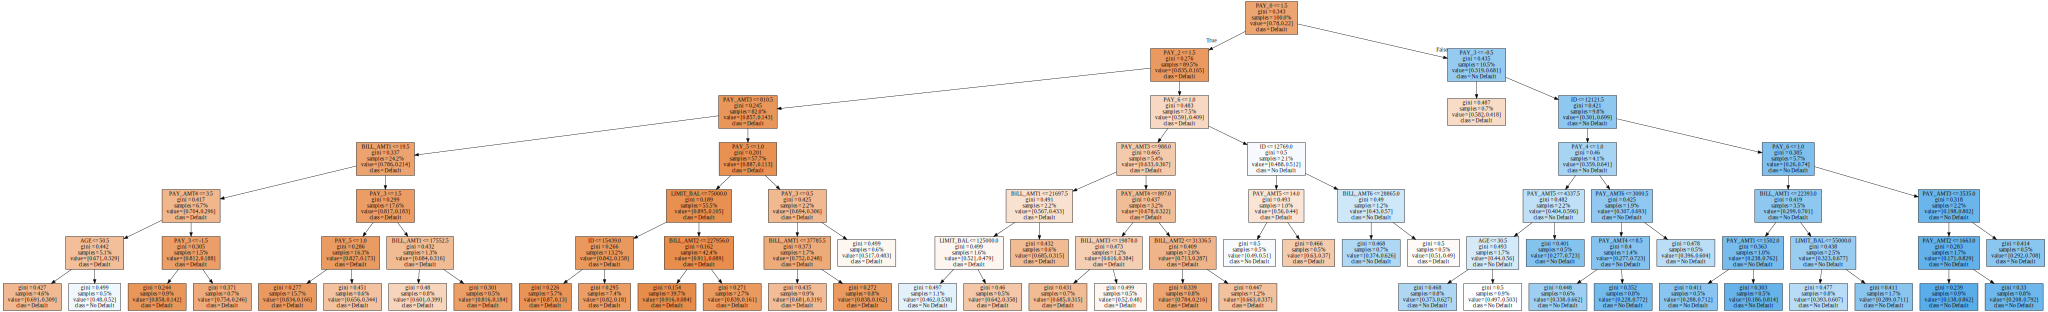

In [4]:
# Let's visualize the tree by using the graphviz package to make it more visual to us
%matplotlib inline
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["Default", "No Default"],
                feature_names=X.columns, impurity=True, filled=True, proportion=True)
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### --------------------------------------Question 2 Set up a probability tree algorithm to predict the class variable. Again, post the 4-5 important lines of code in either R or Python.---------------------------------------------

In [5]:
# 1) Random Forest is a probability tree algorthm which uses the ensemble method to build multiple number of decision trees to average out the performance
# This would give us a very stable model, however, it is not difficult to explain the which features are important in which model.
# 2) Again, Random Forest can handle both continuous and categorical target variable , 
# so we set 'default.payment.next.month' as a binary target variable, and split data with hold-out methold with 70% to 30%
# 3) After running the model, we get model accuracy equal to 82% both on the training and test set. This is a very good model.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X=df.drop(['default.payment.next.month'], axis=1)
y=df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1859, test_size=0.3)
forest = RandomForestClassifier(n_estimators=30, random_state=1859)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

Test set predictions:
 [0 0 0 ... 0 0 1]
Training set score: 0.82
Test set score: 0.82


### -----------------------------------------END--------------------------------------------------------------